# Shape File to BinaryMask - simple example

## Development version

This notebook illustrates the conversion of a toy example from a shapefile to a binary mask.

### Python packages import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import pprint
from satsense.util import load_from_file, save_mask2file
from satsense.util.shapefile import load_shapefile2multipolygon as sh2mul # loading shapefile to multipolygon
from satsense.util.shapefile import show_multipolygon as shmp # visualization of multipolygons
from satsense.util.conversions import multipolygon2mask as mp2m # conversion from multipolygon to mask
import fiona as f

### Visualization parameters

In [2]:
GREEN = '#008000'
offset = 100
alpha = 0.8
offset = 100

### Load a simple shapefile to a shapely multipolygon

In [3]:
# path
path = '/home/elena/DynaSlum/Data/misc/'

# filename
ext = 'shp'
fname = 'rectangles' + '.' + ext

# full filename
shape_fullfname = os.path.join(path, fname)

In [4]:
multi, bounds = sh2mul(shape_fullfname)
print(multi.is_valid)
xmin, ymin, xmax, ymax = bounds
print("Shape bounds: xmin: ", xmin, "xmax: ", xmax, "ymin: ", ymin, "ymax: ", ymax)

True
Shape bounds: xmin:  102285.0379266751 xmax:  105285.41719342604 ymin:  2823314.4986072425 ymax:  2826614.95821727


From the bounds define the figure axes limits.

In [5]:
extent = int(xmin) - offset, int(ymin) - offset, int(xmax) + offset, int(ymax) + offset
print(extent)

(102185, 2823214, 105385, 2826714)


### Display the multipolygon

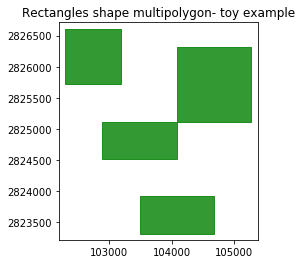

In [6]:
_, ax = plt.subplots()
ax = shmp(multi, ax, False, extent, GREEN, alpha,'Rectangles shape multipolygon- toy example')

### Convert the multipolygon to binary mask

Set an example world coordinates transform.

In [7]:
t = [101985.0, 300.0379266750948, 0.0,
     2826915.0, 0.0, -300.041782729805]

[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 255 255 255   0   0   0   0   0   0   0   0]
 [  0 255 255 255   0   0   0 255 255 255 255   0]
 [  0 255 255 255   0   0   0 255 255 255 255   0]
 [  0   0   0   0   0   0   0 255 255 255 255   0]
 [  0   0   0   0   0   0   0 255 255 255 255   0]
 [  0   0   0 255 255 255 255   0   0   0   0   0]
 [  0   0   0 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0 255 255 255 255   0   0   0]]
(12, 12)


/home/elena/anaconda3/envs/satelite/lib/python3.5/site-packages/rasterio/features.py:303: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


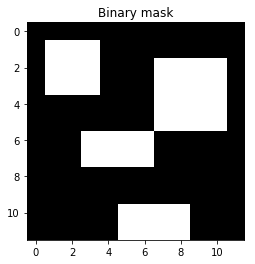

In [8]:
rows = 12
cols = 12
default_val = 255
binary_mask = mp2m(multi, rows, cols, t, default_val)

print(binary_mask)
print(binary_mask.shape)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary mask')

Save the mask into a file.

In [14]:
# raster filename
ext = 'tif'
fname = 'rectangles_mask' + '.' + ext

# full filename
mask_fullfname = os.path.join(path, fname)
print(mask_fullfname)

/home/elena/DynaSlum/Data/misc/rectangles_mask.tif


In [15]:
save_mask2file(binary_mask, mask_fullfname)
#w,h = binary_mask.shape
#with rasterio.open(
#        mask_fullfname, 'w',
#        driver='GTiff',
#        dtype=rasterio.uint8,
#        count=1,
#        width=w,
#        height=h) as dst:
#    dst.write(binary_mask, indexes=1)

/home/elena/anaconda3/envs/satelite/lib/python3.5/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


Open the saved file to visualize.

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.  255.  255.  255.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.  255.  255.  255.    0.    0.    0.  255.  255.  255.  255.    0.]
 [   0.  255.  255.  255.    0.    0.    0.  255.  255.  255.  255.    0.]
 [   0.    0.    0.    0.    0.    0.    0.  255.  255.  255.  255.    0.]
 [   0.    0.    0.    0.    0.    0.    0.  255.  255.  255.  255.    0.]
 [   0.    0.    0.  255.  255.  255.  255.    0.    0.    0.    0.    0.]
 [   0.    0.    0.  255.  255.  255.  255.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.  255.  255.  255.  255.    0.    0.    0.]
 [   0.    0.    0.    0.    0.  255.  255.  255.  255.    0.    0.    0.]]


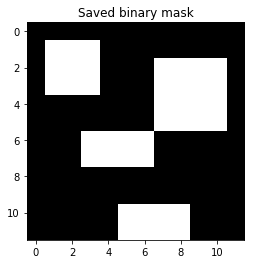

In [16]:
_, saved_mask = load_from_file(mask_fullfname)
saved_mask = np.squeeze(saved_mask)

print(saved_mask)
plt.imshow(saved_mask, cmap='gray')
plt.title('Saved binary mask')